<a href="https://colab.research.google.com/github/MazurovaNN/-Python-Data-Science-Numpy-Matplotlib/blob/main/lesson4_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B2_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуализация данных в Matplotlib

## Построение графиков в Matplotlib

Мы приступаем к изучению средств для визуализации данных в `Python`. Для этого широко распространена библиотека `Matplotlib`. Она рассчитана на работу с двумерными и трёхмерными графиками с целью визуализации данных. Очень часто эта библиотека используется для иллюстрации научных работ.

Для начала импортируем необходимые библиотеки и выполним необходимые действия.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Следующая магическая команда `Jupyter Notebook` нужна для того, чтобы графики отображались прямо в ноутбуке, а не в отдельном окне:

In [2]:
%matplotlib inline

### Диаграммы

Самый простой способ построить график в `matplotlib` - с помощью набора точек. Зададим отдельно координаты этих точек на оси `x` и на оси `y`. Библиотека `matploltlib` поддерживает работу с массивами `numpy`, поэтому координаты наших точек зададим именно в таком виде.

In [3]:
x = np.arange(0, 11)

print(x)

[ 0  1  2  3  4  5  6  7  8  9 10]


Построим, например, график функции $y = x^2$. В этом случае массив из координат точек на оси `y` будет состоять из квадратов значений координат на оси `x`:

In [4]:
y = x ** 2

print(y)

[  0   1   4   9  16  25  36  49  64  81 100]


Передадим эти два массива в функцию `plt.plot` чтобы получить желаемый график:

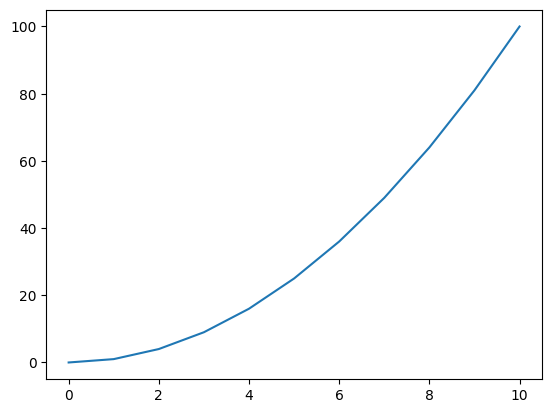

In [5]:
plt.plot(x, y)

plt.show()

Кстати, если координаты по оси `x` представляют собой последовательность натуральных чисел, которая начинается с 0, то значение `x` в функцию можно и не передавать:

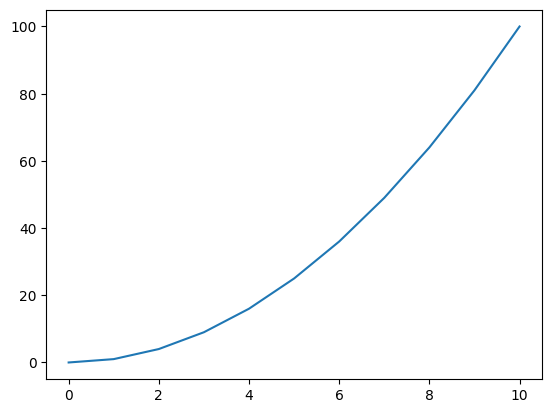

In [6]:
plt.plot(y)

plt.show()

Графики, которые мы построили здесь, называются _линейными диаграммами_: они получены путём соединения точек прямыми линиями.

Рассмотрим также другой тип диаграмм - _точечные диаграммы_ (или _диаграммы разброса_):

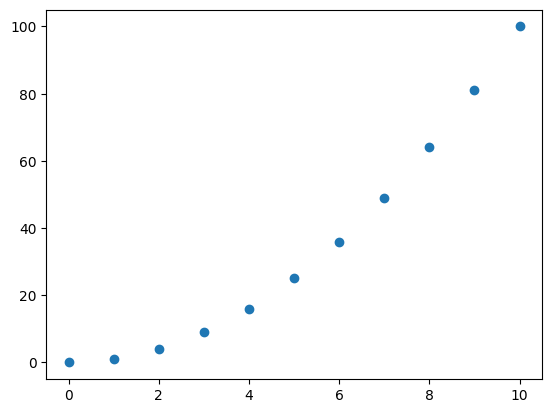

In [7]:
plt.scatter(x, y)

plt.show()

### Масштаб

На всех построенных нами диаграммах был использован _линейный масштаб_. При таком масштабе расстояния между точками на оси пропорциональны разностям между значениями в этих точках. Однако, бывают случаи, когда рассматриваемые значения отличаются на порядки. В этом случае, линейный масштаб не всегда позволяет уловить разницу между более близкими значениями.

Например, рассмотрим несколько списков:

In [8]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars',
           'Jupiter', 'Saturn', 'Uranus', 'Neptune']

masses = [0.055274, 0.815, 1.0, 0.107,
          317.8, 95.0, 14.6, 17.147]

В первом списке указаны имена планет Солнечной системы, а во втором - их массы относительно массы планеты Земля.

Построим график этих значений:

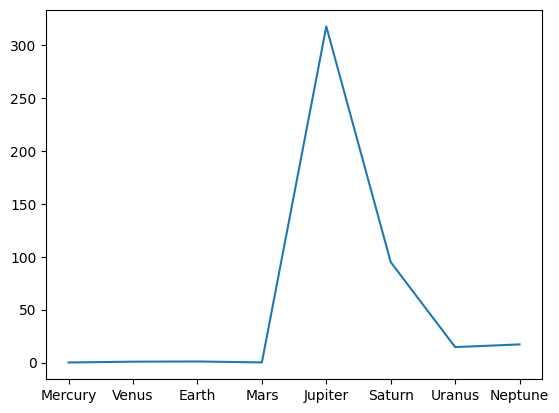

In [9]:
plt.plot(planets, masses)

plt.show()

Поскольку относительные массы первых четырёх планет отличаются друг от друга не так сильно, как, например, от относительной массы Юпитера, зависимость между их относительными массами уловить по этому графику невозможно. В этом случае, полезным оказывается _логарифмический масштаб_. Применим его по оси `y`:

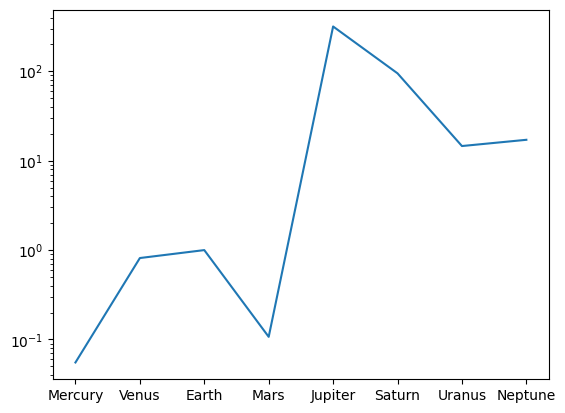

In [10]:
plt.plot(planets, masses)
plt.yscale(value="log")

plt.show()

Логарифмический масштаб означает, что на выбранной оси (в нашем случае, на оси `y`) соседние откладываемые деления будут отличаться в 10 раз. Например, при таком масштабе расстояние между числами 10 и 100 будет таким же, как расстояние между числами 100 и 1000.

Кроме массивов `numpy`, библиотека `matplotlib` также поддерживает структуры данных из библиотеки `pandas`: `Series` и `DataFrame`. Построим массив `Series`, содержащий информацию о планетах:

In [11]:
planets_info = pd.Series(masses, index=planets)

print(planets_info)

Mercury      0.055274
Venus        0.815000
Earth        1.000000
Mars         0.107000
Jupiter    317.800000
Saturn      95.000000
Uranus      14.600000
Neptune     17.147000
dtype: float64


Построить график по массиву `Series` можно с помощью метода `.plot`:

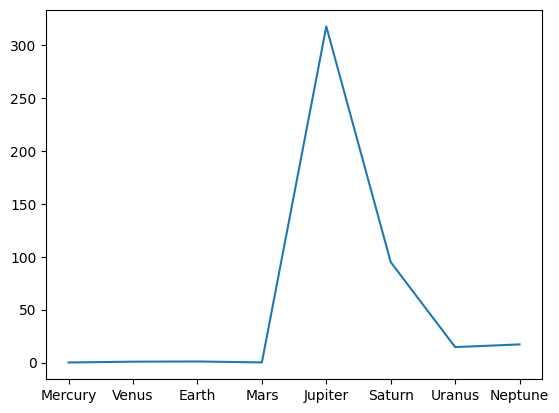

In [12]:
planets_info.plot()

plt.show()

Познакомимся с ещё одним типом диаграммы - _столбчатой диаграммой_:

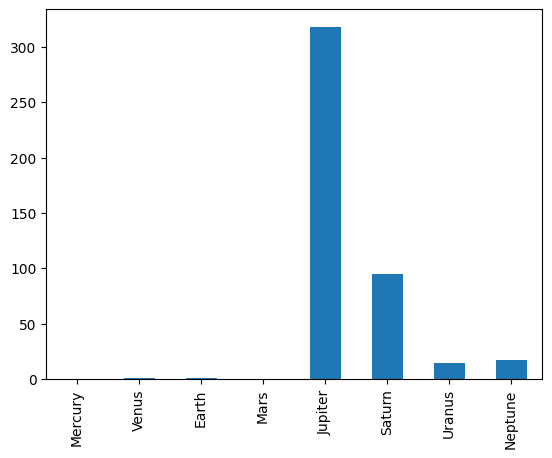

In [13]:
planets_info.plot(kind="bar")

plt.show()

При использовании этого метода, масштаб можно задать прямо внутри метода, используя параметр `logy=True` (что означает, что мы хотим использовать логарифмический масштаб по оси `y`).

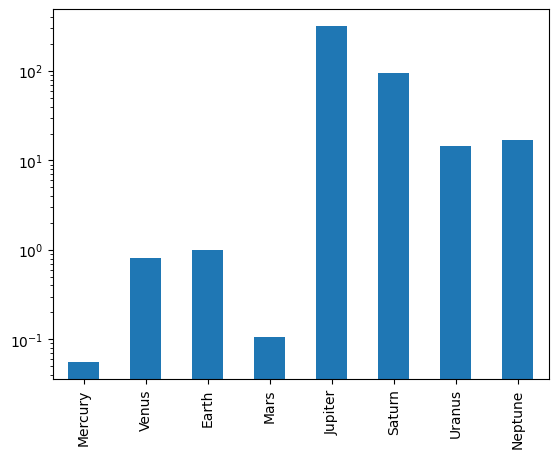

In [14]:
planets_info.plot(kind="bar", logy=True)

plt.show()

Иногда бывает удобно расположить столбцы не вертикально, а горизонтально. Для этого используется тип `"barh"`. В этом случае, логарифмический масштаб надо задавать уже по оси `x`.

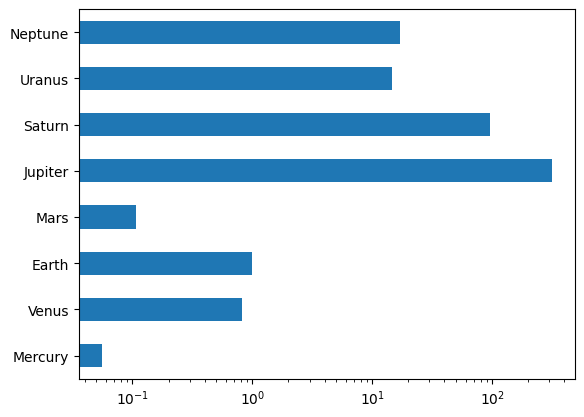

In [15]:
planets_info.plot(kind="barh", logx=True)

plt.show()

### Гистограммы

_Гистограммы_ позволяют визуализировать, каким образом распределена некоторая величина в выборке.

[  0   1   4   9  16  25  36  49  64  81 100]


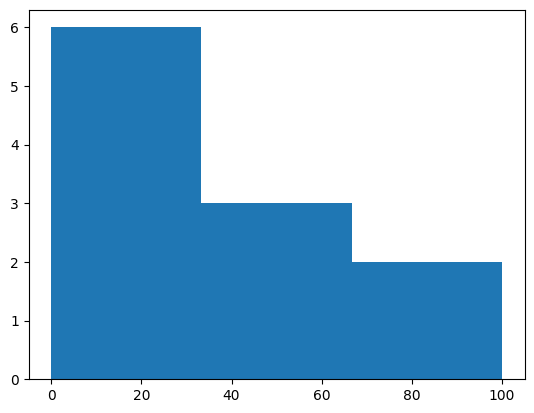

In [16]:
print(y)

hist_info = plt.hist(y, bins=3)

plt.show()

Что представляет из себя гистограмма?

1. По оси `x` на гистограмме равномерно располагаются значения из поданного массива (в нашем случае это числа от 0 до 100).
2. Значения с оси `x` разбивается на заданное число промежутков `bins`. (в нашем случае их 3).
3. По оси `y` для каждого бина откладывается число значений из поданного массива, которые располагаются внутри данного бина.

В ячейке выше мы не просто использовали функцию `plt.hist`, но и присвоили её значение переменной `hist_info`. Разберёмся поподробнее, что же возвращает функция `plt.hist`:

In [20]:
print(hist_info)

(array([6., 3., 2.]), array([  0.        ,  33.33333333,  66.66666667, 100.        ]), <BarContainer object of 3 artists>)


Как мы видим, она возвращает `tuple` из трёх объектов. Первый объект - это массив из значений каждого бина. Тут содержится число элементов поданного массива, которые содержатся в каждом из бинов: 6 элементов в первом, 3 во втором, 2 в третьем.

Второй массив содержит границы каждого бина. Например, границы первого бина - от 0 до 33.3, второго - от 33.3 до 66.6 и т.д.

Вот несколько полезных параметров функции `plt.hist`:

* `edgecolor` - цвет границы бинов. Полезен, если несколько соседних бинов имеют одинаковую высоту.
* `ec` - синоним `edgecolor`.
* `orientation` - ориентация гистограммы. С помощью этого параметра можно расположить гистограмму горизонтально.

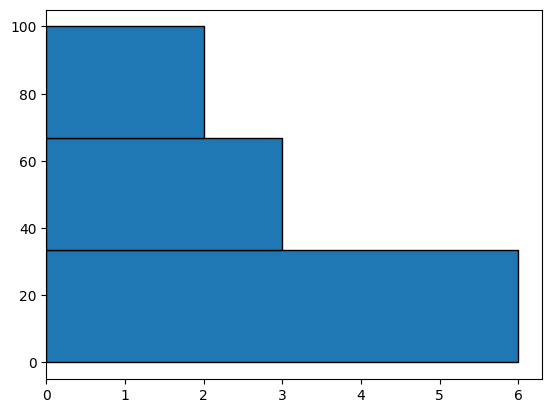

In [21]:
plt.hist(y, bins=3, orientation="horizontal", ec="black")

plt.show()

Рассмотрим в качестве примера так называемый "Индекс Биг-Мака". Это таблица, в которой сравниваются цены на Биг-Мак в различных странах.

Загрузим данные с помощью функции `pd.read_excel` (которая, кстати, позволяет загружать данные даже с помощью ссылки). Выведем на экран первые 10 строк и первые 4 столбца данной таблицы.

In [25]:
# url = "http://infographics.economist.com/2018/databank/BMFile2000toJan2018.xls"

DATASET_PATH = 'BMFile2000toJan2018.csv'
bmi_df = pd.read_csv(DATASET_PATH, sep=',')
bmi_df.head(4)

# bmi_df = pd.read_excel(url)

# bmi_df.iloc[:10, :4]

,Country,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation
0,Argentina,75.00,18.9,4.0,14.2,-25.0,18.7,5.9,21.6,54.7,17.8
1,Australia,5.90,1.3,4.7,1.1,-10.9,-6.4,-16.5,-4.0,22.0,-7.0
2,Brazil,16.50,3.2,5.1,3.1,-3.2,61.0,43.6,65.0,109.8,59.8
3,Britain,3.19,0.7,4.4,0.6,-16.4,-2.5,-13.0,0.0,27.2,-3.1


В поле `Country` записано название страны, по которой измеряется цена на Биг-Мак, `local_price` - цена на Биг-Мак в данной стране в местной валюте, `dollar_ex` - обменный курс Американского доллара к местной валюте, а `dollar_price` - цена на Биг-Мак, переведённая в доллары.

Изучем подробнее последний столбец. Для удобства переведём его в `Series`, используя столбец `Country` в качестве индекса:

In [26]:
bm_price = bmi_df["dollar_price"]
bm_price.index = bmi_df["Country"]

bm_price.head()

Country
Argentina    4.0
Australia    4.7
Brazil       5.1
Britain      4.4
Canada       5.3
Name: dollar_price, dtype: float64

Рассмотрим горизонтальную столбчатую диаграмму из значений этого массива:

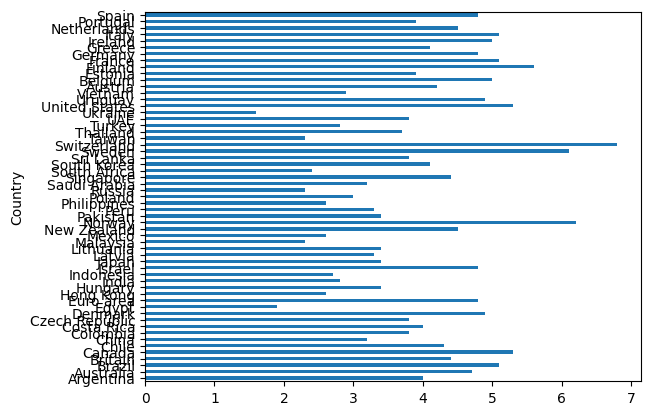

In [27]:
bm_price.plot(kind="barh")

plt.show()

Как мы видим, поскольку значений в этой диаграмме слишком много, использовать её в таком виде невозможно. Увеличим масштаб отображения графики с помощью библиотеки `pylab`:

In [28]:
from pylab import rcParams

rcParams["figure.figsize"] = 9, 12

Таким образом можно задать размер изображения в дюймах. Отобразим теперь диаграмму ещё раз:

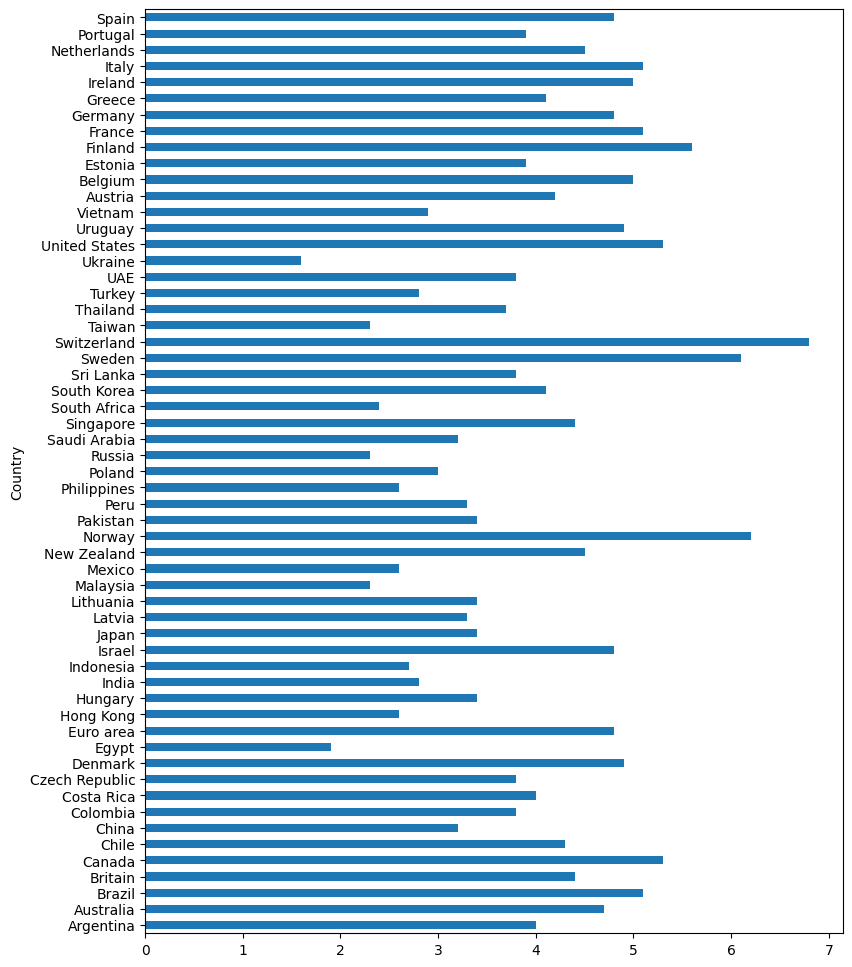

In [29]:
bm_price.plot(kind="barh")

plt.show()

Как мы видим, теперь названия стран видно хорошо. Однако, диаграмму всё ещё тяжело воспринимать, поскольку значения не отсортированы. Для их сортировки воспользуемся уже знакомым методом `.sort_values` для массива `Series`:

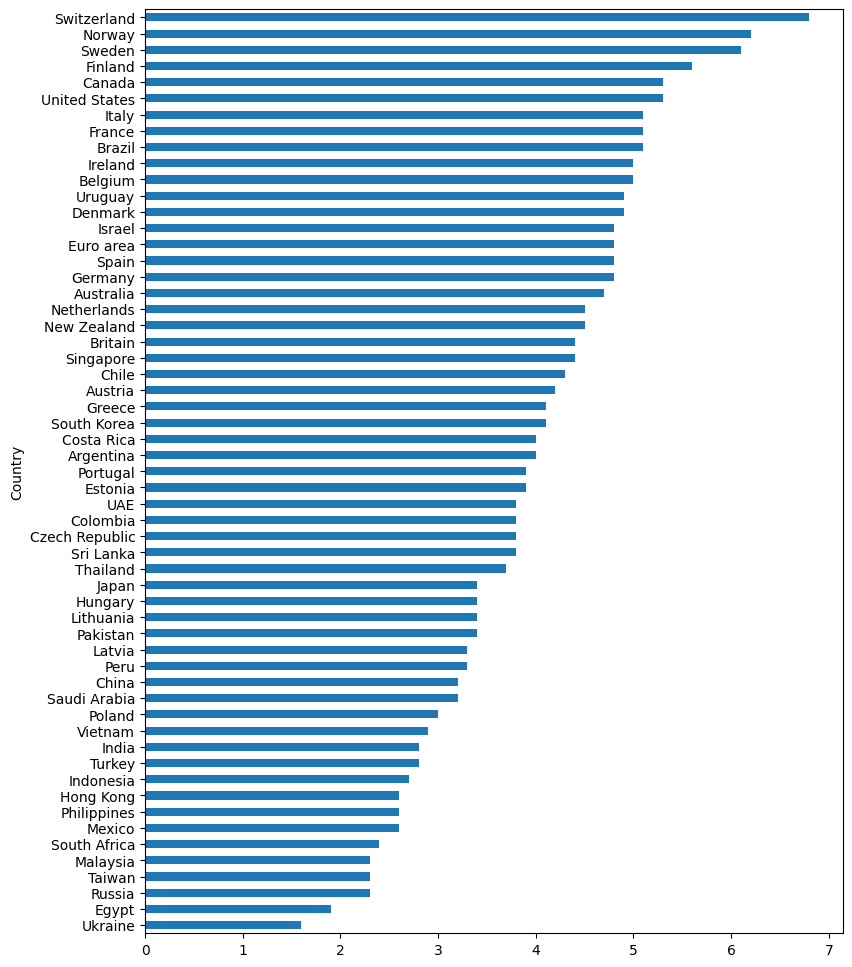

In [30]:
bm_price = bm_price.sort_values()

bm_price.plot(kind="barh")

plt.show()

Теперь построим гистограмму, чтобы выяснить, как распределены цены. Зададим несколько пользовательских параметров:

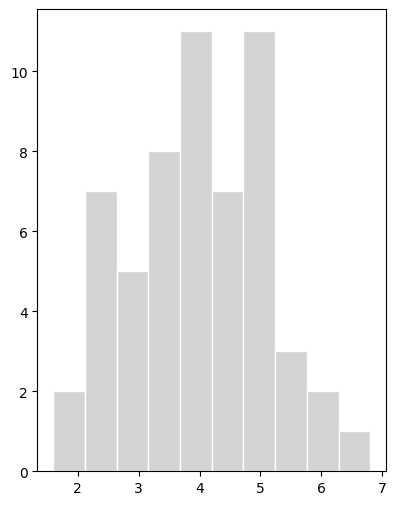

In [31]:
rcParams["figure.figsize"] = 4.5, 6

plt.hist(bm_price, color="lightgrey", ec="white")

plt.show()

### Сохранение графиков в файл

Построенные графики можно сохранять в файл как изображения. Например, сохраним последнюю гистограмму в файл с именем `bm_price` в формате `png`:

TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'fmt'

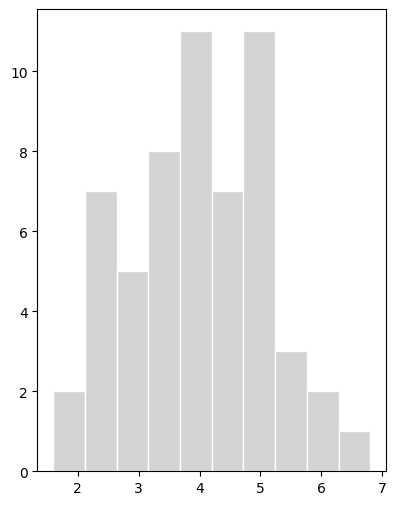

In [33]:
plt.hist(bm_price, color="lightgrey", ec="white")
plt.savefig("bm_price", fmt="png")

## Выведение дополнительной информации на график

Мы уже научились базовым техникам построения графиков в `matplotlib`. Однако, если вашей задачей является презентация каких-либо результатов, только лишь построить графики будет недостаточно. Графики также надо уметь аннотировать, добавлять к ним текст, легенду, сетку и т.д. Разберёмся, как это делать, на примере графика функции $y = x^2$.

Сперва зададим параметры для наших изображений.

In [34]:
rcParams["figure.figsize"] = 5, 3

%config InlineBackend.figure_format = 'svg'

Данная магическая команда позволяет рисовать графики в формате `svg`, т.е. scalable vector graphics - масштабируемая векторная графика. Это придаёт изображениям большую чёткость.

Итак, построим график функции $y = x^2$:

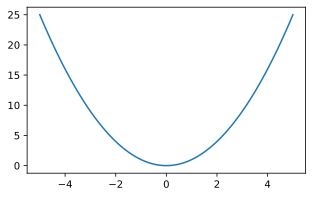

In [35]:
x = np.linspace(-5, 5, 101)
y = x ** 2

plt.plot(x, y)

plt.show()

### Заголовок и названия осей


С помощью функции `plt.title` можно добавить заголовок к графику.

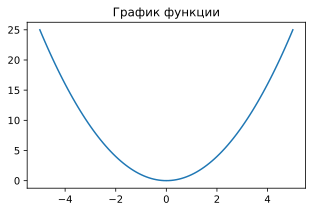

In [56]:
plt.plot(x, y)

plt.title("График функции")

plt.show()

Данная функция также принимает параметры для управления шрифтом заголовка:

* `fontsize` - размер текста
* `fontweight` - насыщенность текста
* `color` - цвет текста
* `family` - семейство шрифтов

В качестве параметра `color` можно подавать как название цвета на английском (например, `black` или `red`), так и код цвета а формате `HEX` (например, `#808080`).

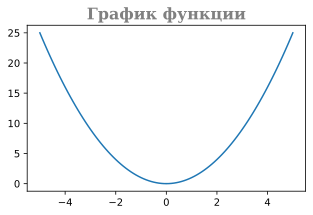

In [57]:
plt.plot(x, y)

plt.title(
    "График функции",
    fontsize=16,
    fontweight="bold",
    color="#808080",
    family="serif",
)

plt.show()

Все эти параметры можно подать также и с помощью словаря, используя аргумент `fontdict`:

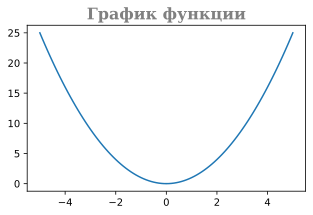

In [58]:
title_font = {
    "fontsize": 16,
    "fontweight": "bold",
    "color": "#808080",
    "family": "serif",
}

plt.plot(x, y)

plt.title("График функции", fontdict=title_font)

plt.show()

Также в функции `plt.title` доступно и другое форматирование заголовка. Например, с помощью параметра `loc` можно задать расположение заголовка:

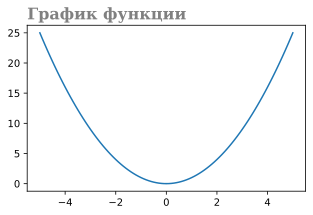

In [59]:
plt.plot(x, y)

plt.title("График функции", fontdict=title_font, loc="left")

plt.show()

Аналогично работают функции `plt.xlabel` и `plt.ylabel`, с помощью которых можно управлять названиями осей:

In [60]:
label_font = {
    "fontsize": 9,
    "family": "serif",
}

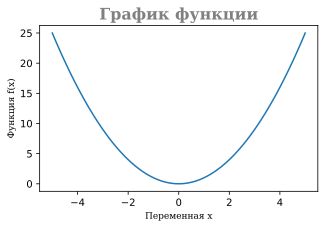

In [61]:
plt.plot(x, y)

plt.title("График функции", fontdict=title_font)
plt.xlabel("Переменная x", fontdict=label_font)
plt.ylabel("Функция f(x)", fontdict=label_font)

plt.show()

### Легенда

Добавим к нашему графику график функции $y = x^3$:

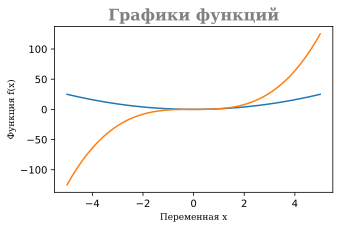

In [62]:
y2 = x ** 3

plt.plot(x, y)
plt.plot(x, y2)

plt.title("Графики функций", fontdict=title_font)
plt.xlabel("Переменная x", fontdict=label_font)
plt.ylabel("Функция f(x)", fontdict=label_font)

plt.show()

По умолчанию `matplotlib` пытается расположить все указанные точки внутри изображения. В нашем случае это привело к тому, что масштабы осей получились слишком разными. Управлять границами осей можно с помощью функции `plt.axis`. В неё мы в виде списка подаём желаемые границы по оси `x` и границы по оси `y`:

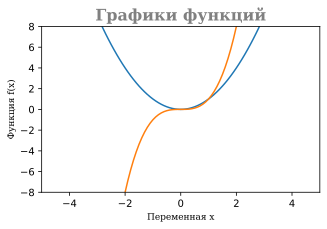

In [63]:
plt.plot(x, y)
plt.plot(x, y2)

plt.title("Графики функций", fontdict=title_font)
plt.xlabel("Переменная x", fontdict=label_font)
plt.ylabel("Функция f(x)", fontdict=label_font)

plt.axis([-5, 5, -8, 8])

plt.show()

Чтобы указать, какой из графиков соответствует какой функции, зададим легенду с помощью функции `plt.legend`:

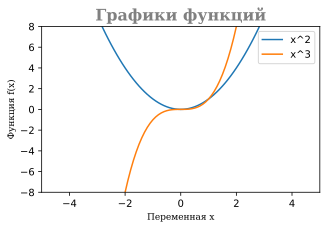

In [64]:
plt.plot(x, y)
plt.plot(x, y2)

plt.title("Графики функций", fontdict=title_font)
plt.xlabel("Переменная x", fontdict=label_font)
plt.ylabel("Функция f(x)", fontdict=label_font)

plt.axis([-5, 5, -8, 8])
plt.legend(labels=["x^2", "x^3"])

plt.show()

В данном случае в качестве параметра `labels` данной функции подаётся список меток. Порядок меток соответствует порядку, в котором графики рисовались (т.е. порядок, в котором вызывались функции `plt.plot`).

Более аккуратным и более удобным способом задания меток к графикам является использование параметра `label` прямо внутри функции `plt.plot`:

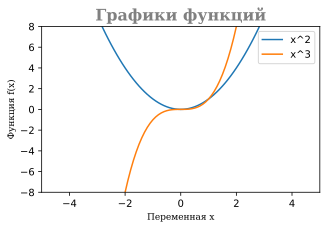

In [65]:
plt.plot(x, y, label="x^2")
plt.plot(x, y2, label="x^3")

plt.title("Графики функций", fontdict=title_font)
plt.xlabel("Переменная x", fontdict=label_font)
plt.ylabel("Функция f(x)", fontdict=label_font)

plt.axis([-5, 5, -8, 8])
plt.legend()

plt.show()

С помощью аргумента `loc` функции `plt.legend` мы можем задать положение легенды на изображении. Например, разместим легенду в правом нижнем углу:

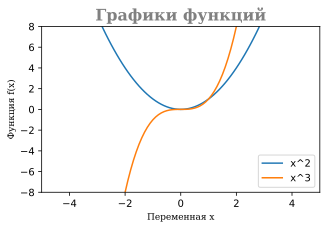

In [66]:
plt.plot(x, y, label="x^2")
plt.plot(x, y2, label="x^3")

plt.title("Графики функций", fontdict=title_font)
plt.xlabel("Переменная x", fontdict=label_font)
plt.ylabel("Функция f(x)", fontdict=label_font)

plt.axis([-5, 5, -8, 8])
plt.legend(loc="lower right")

plt.show()

С помощью параметра `frameon` можно задать, изображать рамку вокруг легенды или нет:

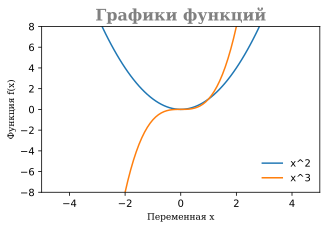

In [67]:
plt.plot(x, y, label="x^2")
plt.plot(x, y2, label="x^3")

plt.title("Графики функций", fontdict=title_font)
plt.xlabel("Переменная x", fontdict=label_font)
plt.ylabel("Функция f(x)", fontdict=label_font)

plt.axis([-5, 5, -8, 8])
plt.legend(loc="lower right", frameon=False)

plt.show()

Для функции `plt.legend` также действуют похожие, однако, иные параметры форматирования. Например, если мы захотим задать формат шрифта через словарь, нам нужно будет использовать немного другие ключи, а также подавать этот словарь в другой параметр:

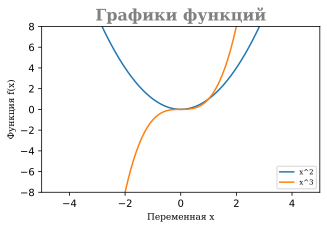

In [68]:
legend_font = {
    "size": 7,
    "family": "serif",
}

plt.plot(x, y, label="x^2")
plt.plot(x, y2, label="x^3")

plt.title("Графики функций", fontdict=title_font)
plt.xlabel("Переменная x", fontdict=label_font)
plt.ylabel("Функция f(x)", fontdict=label_font)

plt.axis([-5, 5, -8, 8])
plt.legend(loc="lower right", prop=legend_font)

plt.show()

Чтобы изменить цвет текста легенды, нужно также выполнить иной набор действий:

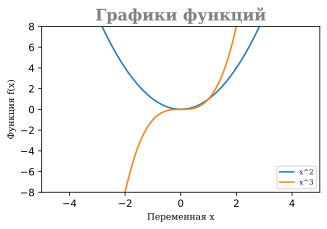

In [69]:
legend_font = {
    "size": 7,
    "family": "serif",
}

plt.plot(x, y, label="x^2")
plt.plot(x, y2, label="x^3")

plt.title("Графики функций", fontdict=title_font)
plt.xlabel("Переменная x", fontdict=label_font)
plt.ylabel("Функция f(x)", fontdict=label_font)

plt.axis([-5, 5, -8, 8])

legend = plt.legend(loc="lower right", prop=legend_font)
plt.setp(legend.get_texts(), color="DarkBlue")

plt.show()

### Оформление графиков и сетка

В функцию `plt.plot` можно также подавать параметры, связанные с оформлением графика:

* `color` - цвет
* `linestyle` - стиль линии

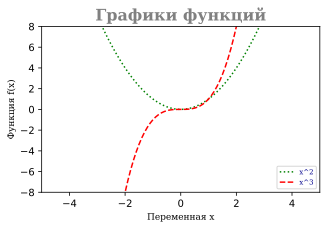

In [70]:
legend_font = {
    "size": 7,
    "family": "serif",
}

plt.plot(x, y, label="x^2", color="green", linestyle="dotted")
plt.plot(x, y2, label="x^3", color="red", linestyle="dashed")

plt.title("Графики функций", fontdict=title_font)
plt.xlabel("Переменная x", fontdict=label_font)
plt.ylabel("Функция f(x)", fontdict=label_font)

plt.axis([-5, 5, -8, 8])

legend = plt.legend(loc="lower right", prop=legend_font)
plt.setp(legend.get_texts(), color="DarkBlue")

plt.show()

С помощью функции `plt.grid` можно нанести сетку на график. Сетка позволяет более точно оценивать значения по графику.

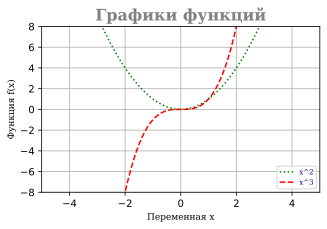

In [71]:
legend_font = {
    "size": 7,
    "family": "serif",
}

plt.plot(x, y, label="x^2", color="green", linestyle="dotted")
plt.plot(x, y2, label="x^3", color="red", linestyle="dashed")

plt.title("Графики функций", fontdict=title_font)
plt.xlabel("Переменная x", fontdict=label_font)
plt.ylabel("Функция f(x)", fontdict=label_font)

plt.axis([-5, 5, -8, 8])

legend = plt.legend(loc="lower right", prop=legend_font)
plt.setp(legend.get_texts(), color="DarkBlue")

plt.grid()

plt.show()

По умолчанию строится сетка серого цвета по обеим осям. И то, и другое можно поменять с помощью параметров `color` и `axis`.

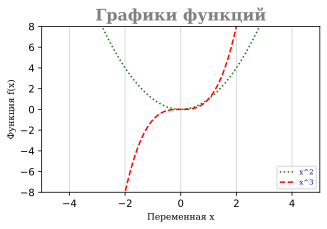

In [72]:
legend_font = {
    "size": 7,
    "family": "serif",
}

plt.plot(x, y, label="x^2", color="green", linestyle="dotted")
plt.plot(x, y2, label="x^3", color="red", linestyle="dashed")

plt.title("Графики функций", fontdict=title_font)
plt.xlabel("Переменная x", fontdict=label_font)
plt.ylabel("Функция f(x)", fontdict=label_font)

plt.axis([-5, 5, -8, 8])

legend = plt.legend(loc="lower right", prop=legend_font)
plt.setp(legend.get_texts(), color="DarkBlue")

plt.grid(axis="x", color="lightgrey")

plt.show()

## Объекты библиотеки Matplotlib

До сих пор мы использовали т.н. _структурный подход_ к построению графиков: мы объявляли команды, связанные с построением графиков, задавали для них какие-то параметры и пр. Плюсами такого подхода являются простота реализации, краткость и понятность кода.

Однако, такой подход не позволяет создавать более сложные графические конструкции. Для таких целей в библиотеке `matplotlib` предусмотрена возможность применить _объектно-ориентированный подход_.

Рассмотрим основные объекты библиотеки `matplotlib` - `Figure` и `Axes`. `Figure` (фигура) - это, грубо говоря, некоторое выделенное место, на котором могут располагаться один или несколько графиков. Такие графики называют объектами `Axes` (оси).

Когда мы запускаем команды для построения графиков, мы не следим за тем, какие объекты при этом создаются, поскольку при структурном подходе такие возможности от нас скрыты. Поэтому здесь, как правило, используется одна фигура, внутри которой размещается один график.

Ранее мы научились строить несколько графиков внутри одного изображения:

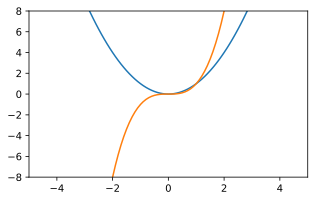

In [73]:
plt.plot(x, y)
plt.plot(x, y2)

plt.axis([-5, 5, -8, 8])

plt.show()

Но что если мы хотели бы построить эти графики не внутри одного изображения, а рядом друг с другом? Это можно сделать, используя объектно-ориентированный подход. Объекты `Figure` и `Axes` можно получить с помощью функции `plt.subplots`. В эту функцию мы подаём желаемое количество "строк" и "столбцов" нашей фигуры. Каждый элемент такой "таблицы" будет занят одним графиком `Axes`. Данная функция возвращает объект `Figure`, а также описанную выше "таблицу" из объектов `Axes`.

Например, построим фигуру, содержащую один графиик, а именно график функции $y = x^2$. В этом случае второе возвращаемое значение содержит в себе лишь один объект `Axes`:

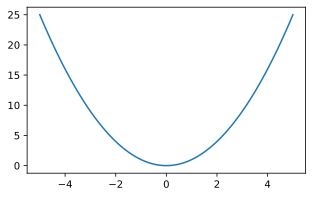

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(x, y)

Если же мы укажем большее число строк или столбцов, второе возвращаемое значение будет содержать в себе многомерный массив `numpy`, содержащий нужное число объектов `Axes`. Например, построим графики наших функций $y = x^2$ и $y = x^3$ на двух графиках, располагающихся последовательно в одной "строке":

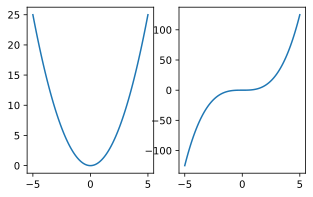

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(x, y)
ax[1].plot(x, y2)

В нашем случае размер фигуры уже задан. Поэтому когда мы пытаемся разместить внутри этой фигуры несколько графиков, их масштабы оказываются не очень реалистичными. Однако, теперь мы можем непосредственно управлять размером фигуры, поскольку у нас есть доступ к объекту `Figure`. С помощью методов этого объекта мы можем задать размер фигуры, а также немного "отодвинуть" графики друг от друга, задав расстояние между ними в ширину.

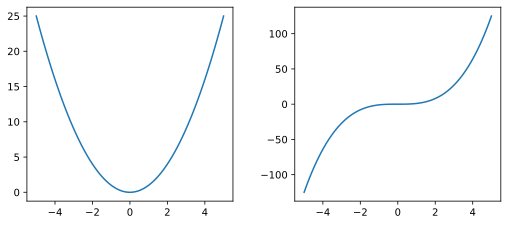

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2)

fig.set_size_inches(8.5, 3.5)
fig.subplots_adjust(wspace=0.3)

ax[0].plot(x, y)
ax[1].plot(x, y2)

Отметим, что значение, передаваемое в параметр `wspace` метода `.subplots_adjust` - это не дюймы, а доли от среднего значения горизонтальных осей графика.

Аналогично мы можем расположить графики и по вертикали. В этом случае для определения расстояния между графиками нужно использовать не параметр `wspace` (здесь `w` - _width_, т.е. ширина), а парметр `hspace` (`h` - _height_, высота).

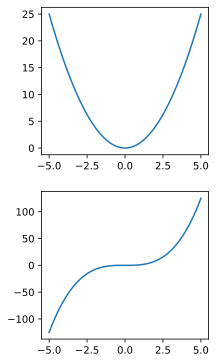

In [77]:
fig, ax = plt.subplots(nrows=2, ncols=1)

fig.set_size_inches(3, 6)
fig.subplots_adjust(hspace=0.25)

ax[0].plot(x, y)
ax[1].plot(x, y2)

Обратите внимание, что несмотря на то, что в нашей фигуре теперь имеется не одна "строка" и два "столбца", две "строки" и один "столбец", массив `ax` всё ещё содержит одномерный массив, поскольку одно из измерений у нас всё ещё размера 1. Чтобы избежать путаницы с индексами, можно использовать метод `.flatten` массива `numpy`, который выравнивает многомерный массив до одномерного, располагая его строки последовательно друг за другом:

In [78]:
ar = np.array([[1, 2],
               [3, 4]])

ar.flatten()

array([1, 2, 3, 4])

Добавим ещё несколько графиков и построим фигуру, состоящую из четырёх графиков. Поскольку мы хотим, чтобы у нашей фигуры было 2 "строки" и 2 "столбца", массив `ax` будет двумерным. Применив к нему метод `.flatten`, мы получим новый массив, в котором сначала будут идти все графики `Axes` из первой строки, а затем все графики из второй строки:

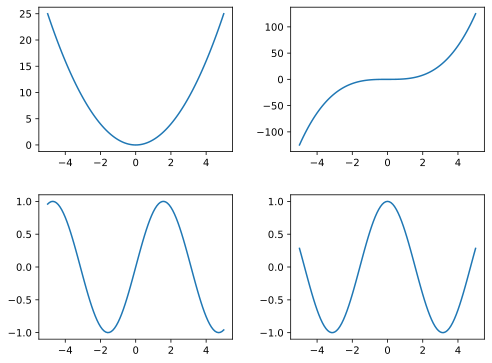

In [79]:
y3 = np.sin(x)
y4 = np.cos(x)

fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(8, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(x, y)
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)

Каждый из этих графиков можно отдельно редактировать наподобие того, как мы это делали выше, используя структурный подход. Например, зададим название каждого из графиков:

Text(0.5, 1.0, 'График cos(x)')

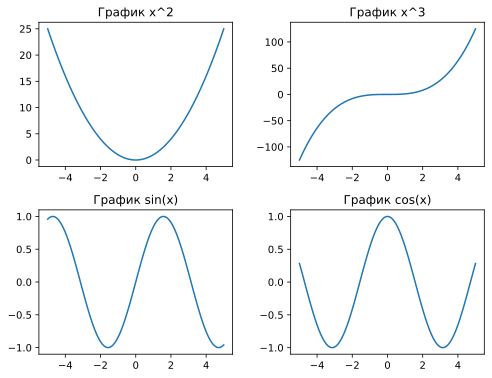

In [80]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(8, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(x, y)
ax1.set_title("График x^2")

ax2.plot(x, y2)
ax2.set_title("График x^3")

ax3.plot(x, y3)
ax3.set_title("График sin(x)")

ax4.plot(x, y4)
ax4.set_title("График cos(x)")

У функции `plt.subplots` есть два интересных параметра: `sharex` и `sharey`. Они отвечают за то, хотим ли мы, чтобы у всех графиков из нашей фигуры была одинаковая шкала по оси `x` или `y`:

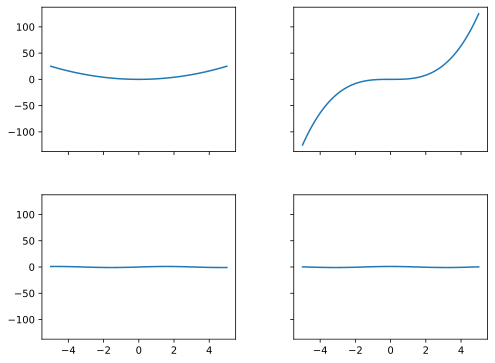

In [81]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(8, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(x, y)
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)

Индивидуально для каждого графика можно задать его пределы по оси `x` и `y` с помощью методов `.set_xlim` и `.set_ylim`:

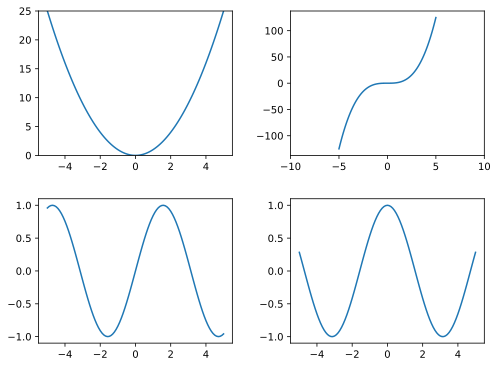

In [82]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(8, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(x, y)
ax1.set_ylim([0, 25])

ax2.plot(x, y2)
ax2.set_xlim([-10, 10])

ax3.plot(x, y3)
ax4.plot(x, y4)